# Analysis - 4

# Sentiment Analysis Of Reviews & its relationship with Price

There are so many factors which contributes towards the price of a listing on AirBnB.While, we already have few conclusions for relationship between various factors and their dependency on prices of a listing,lets analyze if price of a listing dependent upon number of reviews and if yes, how does it varies?

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

reviewsDF = pd.read_csv("../data/reviews.csv")
reviewsDF = reviewsDF.dropna()
reviewsDF.head()

listing_id       id        date  reviewer_id reviewer_name  \
0     1178162  4724140  2013-05-21      4298113       Olivier   
1     1178162  4869189  2013-05-29      6452964     Charlotte   
2     1178162  5003196  2013-06-06      6449554     Sebastian   
3     1178162  5150351  2013-06-15      2215611        Marine   
4     1178162  5171140  2013-06-16      6848427        Andrew   

                                            comments  
0  My stay at islam's place was really cool! Good...  
1  Great location for both airport and city - gre...  
2  We really enjoyed our stay at Islams house. Fr...  
3  The room was nice and clean and so were the co...  
4  Great location. Just 5 mins walk from the Airp...

To retrieve the 'sentiment' of comments - 'positive','negative' or 'neutral' I am using built-in analyzer in the NLTK Python library to assign polarity scoore to each comment.

In [3]:
#assigning polarity score to each comment and adding the same to dataframe

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

reviewsDF['polarity_value']="Default"
reviewsDF['neg']=0.0
reviewsDF['pos']=0.0
reviewsDF['neu']=0.0
reviewsDF['compound']=0.0
for index,row in reviewsDF.iterrows():
    ss = sid.polarity_scores(row['comments'])
    reviewsDF.set_value(index,'polarity_value',ss)
    reviewsDF.set_value(index,'neg',ss['neg'])
    reviewsDF.set_value(index,'pos',ss['pos'])
    reviewsDF.set_value(index,'neu',ss['neu'])
    reviewsDF.set_value(index,'compound',ss['compound'])
reviewsDF.head()

C:\Users\Ruchi\AppData\Local\Continuum\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


listing_id       id        date  reviewer_id reviewer_name  \
0     1178162  4724140  2013-05-21      4298113       Olivier   
1     1178162  4869189  2013-05-29      6452964     Charlotte   
2     1178162  5003196  2013-06-06      6449554     Sebastian   
3     1178162  5150351  2013-06-15      2215611        Marine   
4     1178162  5171140  2013-06-16      6848427        Andrew   

                                            comments  \
0  My stay at islam's place was really cool! Good...   
1  Great location for both airport and city - gre...   
2  We really enjoyed our stay at Islams house. Fr...   
3  The room was nice and clean and so were the co...   
4  Great location. Just 5 mins walk from the Airp...   

                                      polarity_value  neg    pos    neu  \
0  {'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'comp...  0.0  0.352  0.648   
1  {'neg': 0.0, 'neu': 0.639, 'pos': 0.361, 'comp...  0.0  0.361  0.639   
2  {'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'comp...  0.0  0.233  0.767   
3  {'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'comp...  0.0  0.327  0.673   
4  {'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'comp...  0.0  0.363  0.637   

   compound  
0    0.9626  
1    0.9061  
2    0.9663  
3    0.9267  
4    0.8658

In [3]:
reviewsDF.to_csv('pority_Values_reviews.csv')

In [4]:
# Our dataframe consists of reviews in different language as well.Hence removing the comments which are not in english
from langdetect import detect

def detect_lang(sente):
    sente=str(sente)
    try:
        return detect(sente)
    except:
        return "None"

for index,row in reviewsDF.iterrows():
    lang=detect_lang(row['comments'])
    reviewsDF.set_value(index,'language',lang)
    
#taking rows whose language is English
EngReviewsDF=reviewsDF[reviewsDF.language=='en']

EngReviewsDF.head(2)

listing_id       id        date  reviewer_id reviewer_name  \
0     1178162  4724140  2013-05-21      4298113       Olivier   
1     1178162  4869189  2013-05-29      6452964     Charlotte   

                                            comments  \
0  My stay at islam's place was really cool! Good...   
1  Great location for both airport and city - gre...   

                                      polarity_value  neg    pos    neu  \
0  {'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'comp...  0.0  0.352  0.648   
1  {'neg': 0.0, 'neu': 0.639, 'pos': 0.361, 'comp...  0.0  0.361  0.639   

   compound language  
0    0.9626       en  
1    0.9061       en

In [5]:
# Lets visualize polarity score for positivity

polarDF=EngReviewsDF[['pos']]
polarDF=polarDF.groupby(pd.cut(polarDF["pos"], np.arange(0, 1.1, 0.1))).count()
polarDF=polarDF.rename(columns={'pos':'count_of_Comments'})
polarDF=polarDF.reset_index()
polarDF=polarDF.rename(columns={'pos':'range_i'})
for i,r in polarDF.iterrows():
    polarDF.set_value(i,'RANGE',float(str(r['range_i'])[1:4].replace(',',''))) 
    polarDF.set_value(i,'Sentiment','positive')
del polarDF['range_i']
polarDF.head()

count_of_Comments  RANGE Sentiment
0               2143    0.0  positive
1              11939    0.1  positive
2              20783    0.2  positive
3              15752    0.3  positive
4               7406    0.4  positive

In [6]:
# Lets visualize polarity score for negativity

polarDFneg=EngReviewsDF[['neg']]
polarDFneg=polarDFneg.groupby(pd.cut(polarDFneg["neg"], np.arange(0, 1.1, 0.1))).count()
polarDFneg=polarDFneg.rename(columns={'neg':'count_of_Comments'})
polarDFneg=polarDFneg.reset_index()
polarDFneg=polarDFneg.rename(columns={'neg':'range_i'})
for i,r in polarDFneg.iterrows():
    polarDFneg.set_value(i,'RANGE',float(str(r['range_i'])[1:4].replace(',',''))) 
    polarDFneg.set_value(i,'Sentiment','negative')
del polarDFneg['range_i']
for i,r in polarDFneg.iterrows():
    polarDF=polarDF.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
    
polarDFneg.head()

count_of_Comments  RANGE Sentiment
0              18087    0.0  negative
1               1448    0.1  negative
2                142    0.2  negative
3                 21    0.3  negative
4                 13    0.4  negative

In [7]:
# Lets visualize polarity score for neutrality

polarDFnut=EngReviewsDF[['neu']]
polarDFnut=polarDFnut.groupby(pd.cut(polarDFnut["neu"], np.arange(0, 1.0, 0.1))).count()
polarDFnut=polarDFnut.rename(columns={'neu':'count_of_Comments'})
polarDFnut=polarDFnut.reset_index()
polarDFnut=polarDFnut.rename(columns={'neu':'range_i'})
for i,r in polarDFnut.iterrows():
    polarDFnut.set_value(i,'RANGE',float(str(r['range_i'])[1:4].replace(',',''))) 
    polarDFnut.set_value(i,'Sentiment','neutrl')
del polarDFnut['range_i']

for i,r in polarDFnut.iterrows():
    polarDF=polarDF.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
    
polarDFnut.head()

count_of_Comments  RANGE Sentiment
0                  9    0.0    neutrl
1                204    0.1    neutrl
2                581    0.2    neutrl
3               1310    0.3    neutrl
4               3243    0.4    neutrl

In [8]:
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.factorplot(data=polarDF, x="RANGE", y="count_of_Comments",col="Sentiment") 


It can be seen that Almost none of the texts are classified as having significant amounts of negativity. In fact, a significant amount of them are given exactly 0.0 negativity.It can be clearly seen that most of the comments are neutral.However, a signifigant amount of comments are positive.

We can loosely interpret number of reviews as times people have stayed in the said listing. Of course, this depends on when the listing appeared, how long it appeared for, and various other factors. But it could serve to be useful information to see correlation between price and number of reviews.Lets check if there is any relationship between number of reviews and price of listing

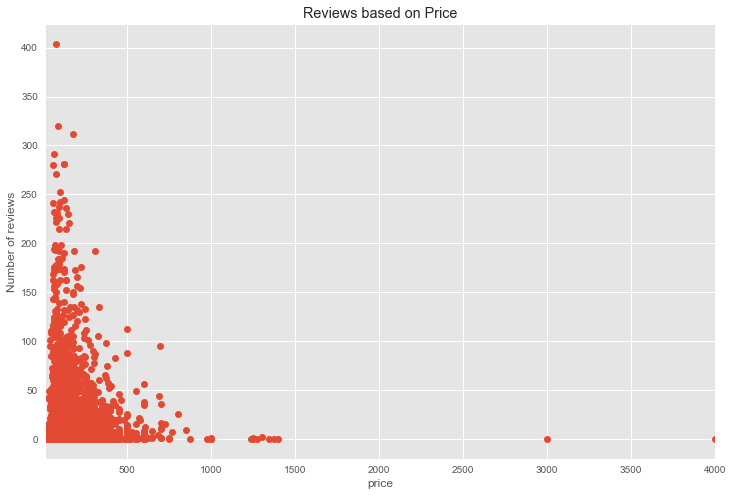

In [182]:
inputDF = pd.read_csv('listings.csv')
inputDF=inputDF[['number_of_reviews','price','review_scores_rating']]

# replacing NaN values with 0
inputDF.fillna(0, inplace=True)

#Extracting prices from the table
price = inputDF['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

#replace the price column with the new column
inputDF['price']=prices

price_review = inputDF[['number_of_reviews', 'price']].sort_values(by = 'price')

price_review.plot(x = 'price', 
                  y = 'number_of_reviews', 
                  style = 'o',
                  figsize =(12,8),
                  legend = False,
                  title = 'Reviews based on Price')

plt.xlabel("price")
plt.ylabel("Number of reviews")

The graph shows that listings with prices that range around 100 - 400 get the most reviews, probably because they are in the most reasonable price range. The number quickly declines as the price goes up.
This indicates that more people book listings that are around $100 - 400 in prices.
This shows that it is not necessary for an expensive listing to have large number of reviews.Heneforth there is no exact relation between Prices and Number of Reviews for a listing.

Lets analyze what were the most talked about words in all the comments.

In [177]:
from nltk.corpus import stopwords
import string
import nltk

words=''
for index,row in EngReviewsDF.iterrows():
    words += row['comments']

In [178]:
reviews_data=nltk.word_tokenize(words)
string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s",'!',',',]
nums=['0','1','2','3','4','5','6','7','8','9']

In [179]:
from nltk.corpus import stopwords

cachedStopWords = stopwords.words("english")
cachedStopWords.append('the')

words_only = [''.join(c for c in s if c not in string.punctuation if c not in nums if c not in ignoreChar) for s in reviews_data]
words_only = [s for s in words_only if s]
comments_filtered_data=' '.join(words_only)
comments_filtered_data = ' '.join([word.lower() for word in comments_filtered_data.split() if word not in cachedStopWords])

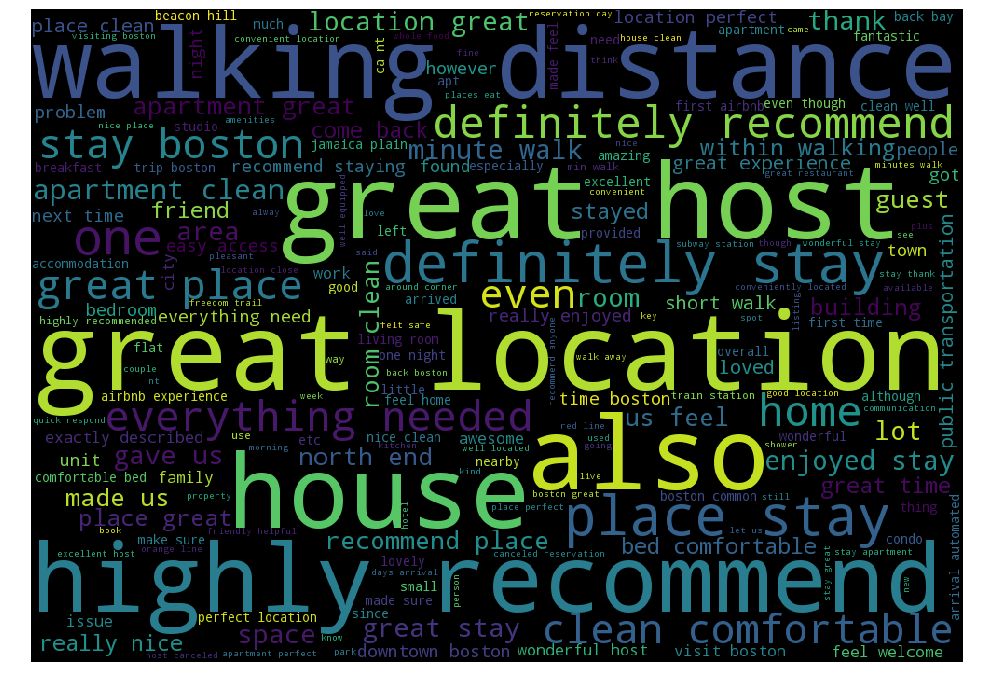

In [181]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700).generate(comments_filtered_data)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

It can be seen that the most talked about words are "great location", "great host", "walking distance" and "highly recommended".All these reviews and comments plays a big role in attracting the attention of travellers and if there are comments such as "highly recommended" then travellers surely takes a look at the listing.